In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
pwd

'/atlas/u/kechoi/multi-fairgen/notebooks'

In [4]:
cd ../

/atlas/u/kechoi/multi-fairgen


# Ratios (perc=1.0)

In [9]:
perc = 1.0

data = np.load('classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

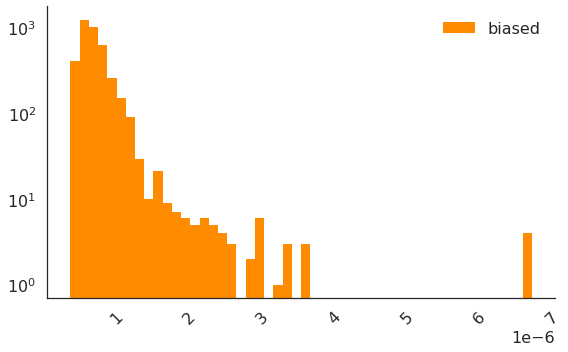

In [10]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased', color='darkorange')
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

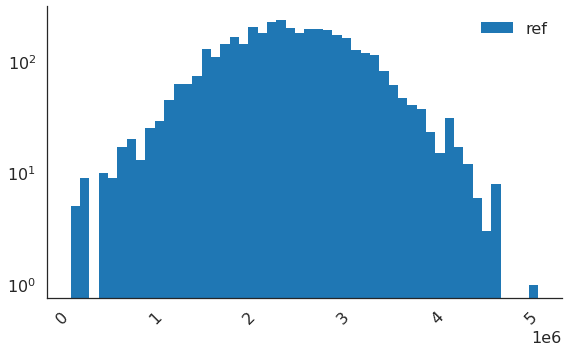

In [11]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref')
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

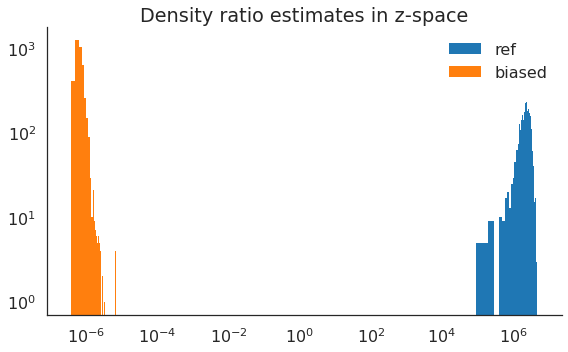

In [20]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

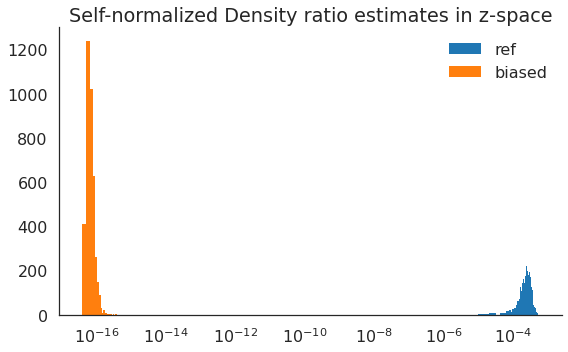

In [15]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1])/new_ratios.sum(), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0])/new_ratios.sum(), bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Self-normalized Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.051575016 0.09234931
9.815926 21.934351


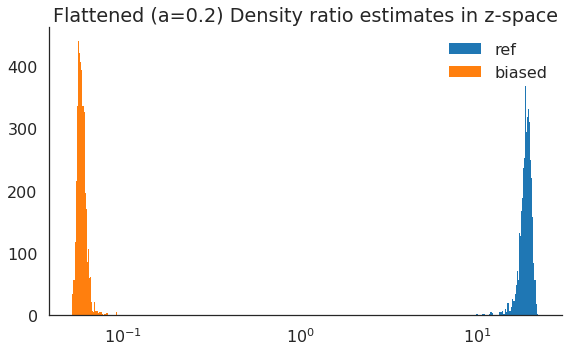

In [19]:
alpha = 0.2

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))

# Ratios (perc=0.1)

In [21]:
perc = 0.1

data = np.load('classification/results/mnist_subset_z_perc{}/val_ratios.npz'.format(perc))
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

if len(ratios) != len(y):
    print('a few ratios were thrown out bc of infs')

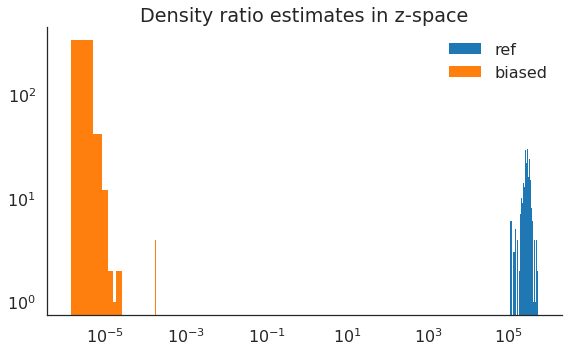

In [22]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

0.067385286 0.17764476
10.156002 13.98298


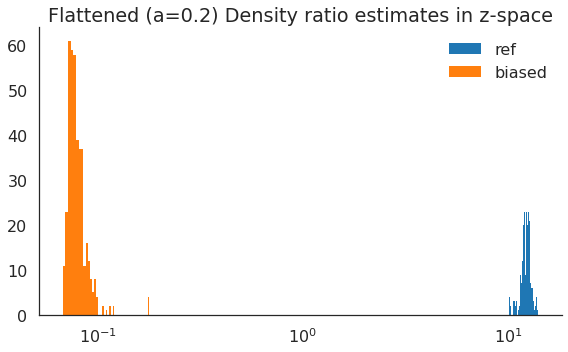

In [23]:
alpha = 0.2

plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**alpha, bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]**alpha, bins=50, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened (a={}) Density ratio estimates in z-space'.format(alpha))
plt.legend()
sns.despine()
plt.tight_layout()

print(np.min(new_ratios[y==0]**alpha), np.max(new_ratios[y==0]**alpha))
print(np.min(new_ratios[y==1]**alpha), np.max(new_ratios[y==1]**alpha))